[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/refugies-info/genai-for-public-good/blob/main/notebooks/Cat√©gorie-Classifier.ipynb)

#**Simplification Typology Classifier using mBert**





This NoteBook is deticated to explore the use of pre-trained transformer-based models for multiclass text classification. The primary focus is on predicting the appropriate simplification strategies required to simplify respective SE sentences.




---
> ### Load the data

----


In [1]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1z-SRYUL6bAHQ-vfP0AJgxMjpkCd-56iP"


Downloading...
From: https://drive.google.com/uc?id=1z-SRYUL6bAHQ-vfP0AJgxMjpkCd-56iP
To: /content/ri_annotated_texts_final.csv
100% 76.8k/76.8k [00:00<00:00, 117MB/s]


In [2]:
import pandas as pd
file_path = 'ri_annotated_texts_final.csv'
data = pd.read_csv(file_path)



---




> ### Data Exploration and Analysis





---



In [3]:
# Display basic information and first few rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Version initiale   370 non-null    object
 1   Version retrait√©e  370 non-null    object
 2   Cat√©gorie          370 non-null    object
dtypes: object(3)
memory usage: 8.8+ KB


In [4]:
# Display the first few rows of the dataset
data.head()

Version initiale  \
0  Dispositif d'apprentissage du fran√ßais : perme...   
1  Dispositif d'apprentissage du fran√ßais : perme...   
2  Dispositif d'apprentissage du fran√ßais : perme...   
3  Dispositif d'apprentissage du fran√ßais : perme...   
4  Dispositif d'apprentissage du fran√ßais : perme...   

                                   Version retrait√©e     Cat√©gorie  
0  Des ateliers 2 fois par semaine pour progresse...   Explanation  
1  Des ateliers 2 fois par semaine pour progresse...   Explanation  
2  Des ateliers pour progresser en fran√ßais, mieu...  Substitution  
3  Des ateliers pour progresser en fran√ßais, mieu...   Compression  
4  Des ateliers pour progresser en fran√ßais, mieu...     Syntactic



```
load important libiraries for visualisation
```



In [5]:
!pip install seaborn wordcloud ace_tools

In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud



> Distribution of Simplification Strategies



In [7]:
# Plotly bar chart for distribution of categories
fig = px.bar(data['Cat√©gorie'].value_counts().reset_index(),
             x='Cat√©gorie',
             y='count',
             labels={'Cat√©gorie': 'Simplification Strategy', 'count': 'Count'},  # Updated labels
             title='Distribution of Simplification Strategies')
fig.show()



> Text Length Analysis



In [8]:
data['Initial_Length'] = data['Version initiale'].apply(len)
data['Retraited_Length'] = data['Version retrait√©e'].apply(len)

# Plotly histogram for text length comparison
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['Initial_Length'], name='Original Text Length', opacity=0.6))
fig.add_trace(go.Histogram(x=data['Retraited_Length'], name='Simplified Text Length', opacity=0.6))
fig.update_layout(title='Distribution of Text Lengths Before and After Simplification',
                  xaxis_title='Text Length', yaxis_title='Frequency',
                  barmode='overlay')
fig.show()



> Word Frequency Analysis



In [9]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('french'))

def get_most_common_words(text_series, n=20):
    words = ' '.join(text_series).lower()
    words = nltk.word_tokenize(words)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return Counter(words).most_common(n)

# Display top words
print("Top words in Original Text:", get_most_common_words(data['Version initiale']))
print("Top words in Simplified Text:", get_most_common_words(data['Version retrait√©e']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top words in Original Text: [('fran√ßais', 67), ('travail', 36), ('formation', 29), ('comprendre', 25), ('france', 22), ('ateliers', 21), ('vie', 21), ('langue', 20), ('accompagnement', 20), ('cours', 19), ('faire', 19), ('professionnelle', 18), ('apprendre', 18), ('d√©marches', 18), ('savoir', 15), ('niveau', 15), ('besoins', 15), ('mail', 14), ('personnes', 14), ('vocabulaire', 13)]
Top words in Simplified Text: [('fran√ßais', 62), ('travail', 59), ('apprendre', 39), ('trouver', 35), ('formation', 30), ('comprendre', 28), ('√™tre', 28), ('d√©marches', 27), ('mieux', 25), ('ateliers', 24), ('faire', 24), ('professionnel', 23), ('conna√Ætre', 23), ('pouvez', 23), ('niveau', 23), ('communiquer', 22), ('accompagnement', 21), ('mail', 20), ('savoir', 19), ('prendre', 19)]


In [10]:
# Get top words and their frequencies
original_top_words = get_most_common_words(data['Version initiale'])
simplified_top_words = get_most_common_words(data['Version retrait√©e'])

# Convert to DataFrame for better visualization
df_words = pd.DataFrame({
    "Word (Original)": [word for word, _ in original_top_words],
    "Frequency (Original)": [freq for _, freq in original_top_words],
    "Word (Simplified)": [word for word, _ in simplified_top_words],
    "Frequency (Simplified)": [freq for _, freq in simplified_top_words],
})

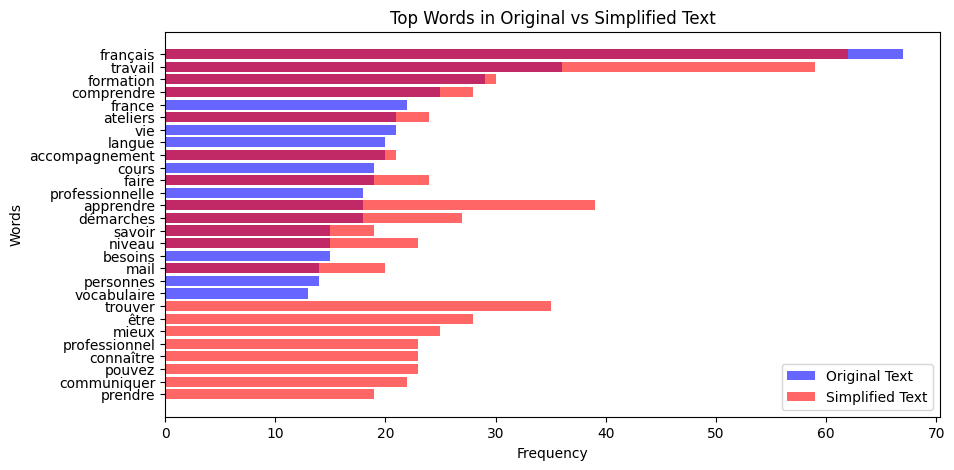

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh([word for word, _ in original_top_words], [freq for _, freq in original_top_words], color='blue', alpha=0.6, label="Original Text")
ax.barh([word for word, _ in simplified_top_words], [freq for _, freq in simplified_top_words], color='red', alpha=0.6, label="Simplified Text")

ax.set_xlabel("Frequency")
ax.set_ylabel("Words")
ax.set_title("Top Words in Original vs Simplified Text")
ax.legend()

plt.gca().invert_yaxis()
plt.show()



> Add blockquote



In [12]:
import pandas as pd

# Ensure the relevant columns are present
assert 'Version initiale' in data.columns and 'Version retrait√©e' in data.columns, "Required columns missing."

# Calculate sentence lengths (number of words per sentence) for complex and simple texts
data['Standard_Length'] = data['Version initiale'].str.split().str.len()
data['E2R_Length'] = data['Version retrait√©e'].str.split().str.len()

# Calculate total number of words in each column
total_words_complex = data['Standard_Length'].sum()
total_words_simple = data['E2R_Length'].sum()

# Compute ranges and interquartile ranges for "Complex" (Version initiale) texts
complex_q1 = data['Standard_Length'].quantile(0.25)
complex_q3 = data['Standard_Length'].quantile(0.75)
complex_iqr = complex_q3 - complex_q1

# Compute ranges and interquartile ranges for "Simple" (E2R version) texts
simple_q1 = data['E2R_Length'].quantile(0.25)
simple_q3 = data['E2R_Length'].quantile(0.75)
simple_iqr = simple_q3 - simple_q1

# Display the results
print("Complex Texts (Version initiale):")
print(f"Total Number of Words: {total_words_complex}")
print(f"Range at 25th Percentile (Q1): {complex_q1} words")
print(f"Range at 75th Percentile (Q3): {complex_q3} words")
print(f"IQR: {complex_iqr} words\n")

print("Simplified Texts (Version retrait√©e):")
print(f"Total Number of Words: {total_words_simple}")
print(f"Range at 25th Percentile (Q1): {simple_q1} words")
print(f"Range at 75th Percentile (Q3): {simple_q3} words")
print(f"IQR: {simple_iqr} words")

Complex Texts (Version initiale):
Total Number of Words: 5005
Range at 25th Percentile (Q1): 6.0 words
Range at 75th Percentile (Q3): 19.0 words
IQR: 13.0 words

Simplified Texts (Version retrait√©e):
Total Number of Words: 5647
Range at 25th Percentile (Q1): 7.0 words
Range at 75th Percentile (Q3): 20.0 words
IQR: 13.0 words


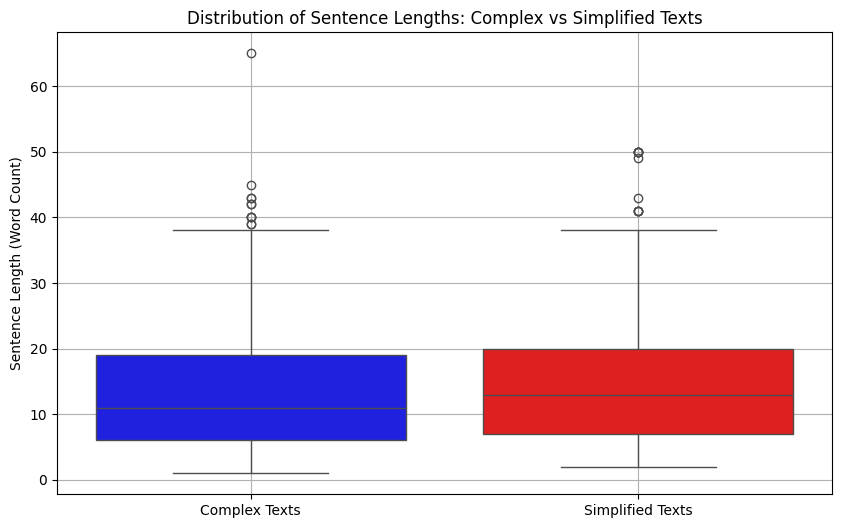

In [13]:
import seaborn as sns

# Enhanced visualization with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Standard_Length', 'E2R_Length']], palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Complex Texts", "Simplified Texts"])
plt.ylabel("Sentence Length (Word Count)")
plt.title("Distribution of Sentence Lengths: Complex vs Simplified Texts")
plt.grid(True)
plt.show()




---



> ### Install Hugging Face Transformers and Datasets library

---

In [14]:
!pip install transformers datasets torch

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 105.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [15]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
)
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import WeightedRandomSampler
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding,
    pipeline
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score




---


> Data Prepration


---




In [16]:
# Prepare the dataset
data = data.dropna(subset=['Version initiale', 'Version retrait√©e', 'Cat√©gorie'])  # Drop rows with missing values
X = data[['Version initiale', 'Version retrait√©e']].values  # Both text inputs
y = data['Cat√©gorie'].tolist()

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Combine Standard French and E2R version with a separator
def combine_texts(row):
    return f"Standard French: {row[0]} [SEP] E2R Version: {row[1]}"

X_combined = [combine_texts(row) for row in X]

# Train-test split
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X_combined, y_encoded, test_size=0.2, random_state=42
)

# Train-test split
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_typologies, val_typologies = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

# Show dataset statistics
print(f"Training samples: {len(train_texts)}")
print(f"Validation samples: {len(val_texts)}")

Training samples: 296
Validation samples: 74




---



> # Fine-tune the Model


---



---

## **1. Data Preparation: Cleaning and Formatting the Dataset**
Before training, we **preprocess the dataset** by:
1. **Handling Missing Values**: Dropping any missing values in the key columns (`Version initiale` and `Cat√©gorie`).
   ```python
   data = data.dropna(subset=['Version initiale', 'Cat√©gorie'])
   ```
2. **Cleaning the Typology Column**: Removing **non-breaking spaces (`\xa0`)** and regular spaces to standardize labels.
   ```python
   data['Typology'] = data['Cat√©gorie'].str.replace("\xa0", "").str.replace(" ", "")
   ```
3. **Encoding Typologies**: Using `LabelEncoder` to convert category labels into numerical values for the model.
   ```python
   label_encoder = LabelEncoder()
   data['Typology Encoded'] = label_encoder.fit_transform(data['Typology'])
   ```

‚úÖ **Why?**  
- Ensures the dataset is clean and structured before augmentation and model training.
- Helps the model recognize category labels in a numerical format.

---

## **2. Data Augmentation: Addressing Class Imbalance**
To **balance underrepresented categories**, we apply **text augmentation** using a **T5-small paraphraser model**:
To improve model performance on underrepresented categories, we applied text  The process follows these steps:

- Identify the three least frequent categories in the dataset.
- Use a **text-to-text generation model (`t5-small`)** to paraphrase sentences from these categories.
- Generate one new paraphrased version for each text sample.
- Append the newly augmented data to the original dataset.
- Re-encode the typologies after augmentation to maintain consistency.

‚úÖ This step ensures that the model gets a balanced representation of all categories, leading to better generalization.

1. Identify the **three least frequent classes** in the dataset.
   ```python
   underrepresented_classes = data['Cat√©gorie'].value_counts().tail(3).index.tolist()
   ```
2. Use `t5-small` for paraphrasing:
   ```python
   paraphraser = pipeline("text2text-generation", model="t5-small")
   ```
3. Generate **augmented text** for samples in these classes:
   ```python
   def augment_text(text):
       augmented = paraphraser(text, max_length=100, num_return_sequences=1)
       return augmented[0]['generated_text']
   ```
4. Add augmented samples to the dataset:
   ```python
   augmented_data = []
   for typology in underrepresented_classes:
       class_data = data[data['Typology'] == typology]
       for _, row in class_data.iterrows():
           augmented_text = augment_text(row['Version initiale'])
           augmented_data.append({'Version initiale': augmented_text, 'Typology': typology})

   augmented_df = pd.DataFrame(augmented_data)
   data = pd.concat([data, augmented_df], ignore_index=True)
   ```

‚úÖ **Why?**  
- Ensures the model **does not ignore** rare categories.
- Generates **synthetic training data** to balance class distribution.

---

## **3. Applying Stratified K-Fold Cross-Validation**
Instead of a **single train-test split**, we use **5-fold stratified cross-validation**: (with `n_splits=5`) to make the training process more robust.
```python
skf = StratifiedKFold(n_splits=5)
```
### **Process:**
- **Splits data into 5 subsets** while preserving the class distribution.
- Trains on 4 subsets and **validates on the remaining subset**.
- **Repeats 5 times** (each subset gets a turn as the validation set).
- Compute **average accuracy, precision, recall, and F1-score** across all folds.

‚úÖ **Why?**  
- Prevents **biased model performance** due to unlucky data splits.
- Ensures **robust evaluation** across different subsets.

---


## **4. Training Arguments for Optimized Model Performance**
We define **custom training arguments** using `TrainingArguments`:
- `output_dir`: Saves the model checkpoints for each fold.
- `evaluation_strategy="epoch"`: Evaluates the model after every epoch.
- `save_strategy="epoch"`: Saves the model at the end of each epoch.
- `learning_rate=5e-5`: A standard learning rate for fine-tuning transformers.
- `per_device_train_batch_size=8`: Small batch size to fit into GPU memory.
- `num_train_epochs=3`: Trains for 3 epochs to prevent overfitting.
- `weight_decay=0.01`: Helps with regularization.
- `load_best_model_at_end=True`: Ensures that the best version of the model is kept.
```python
training_args = TrainingArguments(
    output_dir=f"./results/{model_name}_fold_{fold}",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,  # More epochs, but early stopping prevents overfitting
    weight_decay=0.01,
    logging_dir=f"./logs/{model_name}_fold_{fold}",
    save_total_limit=2,
    load_best_model_at_end=True,
    gradient_accumulation_steps=1,
    fp16=True,  # Mixed precision training for efficiency
    gradient_checkpointing=True,  # Reduces memory consumption
    max_grad_norm=1.0  # Prevents exploding gradients
)
```
Additionally, we use **Early Stopping** to halt training when the model stops improving:
```python
callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
```

‚úÖ **Why?**  
- **Efficient GPU usage** with mixed precision (`fp16`) and gradient checkpointing.
- **Prevents overfitting** by stopping training early when improvement slows.

---

## **5. Model Training and Evaluation**
For each fold:
- **Tokenize input data** and prepare `torch.tensor` datasets.
- **Train the model** using the custom `Trainer`:
  ```python
  trainer = CustomTrainer(
      model=model,
      args=training_args,
      train_dataset=train_dataset,
      eval_dataset=val_dataset,
      data_collator=data_collator,
      compute_metrics=compute_metrics,
      callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
  )
  ```
- **Evaluate and store results** after each epoch:
  ```python
  evaluation_results = trainer.evaluate()
  ```

‚úÖ **Why?**  
- Automates training and validation for **multiple models**.
- Captures **detailed per-epoch and per-fold performance**.

---

## **6. Storing and Analyzing Model Results**
### **Saving Model Performance:**
- **Final aggregated results per model**:
  ```python
  final_results_df = pd.DataFrame(all_model_results)
  final_results_df.to_csv("complex_model_results.csv", index=False)
  ```
- **Detailed per-fold and per-epoch results**:
  ```python
  detailed_results_df = pd.DataFrame(detailed_results)
  detailed_results_df.to_csv("Complex_detailed_model_results.csv", index=False)
  ```
- **Summarized aggregated performance**:
  ```python
  aggregated_summary_df = pd.DataFrame(aggregated_summary)
  aggregated_summary_df.to_csv("Complex_aggregated_model_summary.csv", index=False)
  ```

‚úÖ **Why?**  
- Enables **post-training analysis** to compare models and optimize hyperparameters.

---






> # Model #1 Standared+E2R



# `**This model only Combining Standard and Easy-to-Read (E2R) and the "Categories" for classification.**`



### ** Data Preparation: Combining Standard and Easy-to-Read (E2R) Versions**  

To create a **single input format** for the model, we merged two versions of the text:  
- **Standard Version** (e.g., formal or original text)  
- **Easy-to-Read (E2R) Version** (a simplified or adapted version for better comprehension)  

#### **How We Combined Them:**  
For each data entry, we structured the input text as:  

```python
data['Combined Text'] = data.apply(
    lambda row: f"Standard French: {row['Version initiale']} [SEP] Easy-to-Read: {row['Version retrait√©e']}",
    axis=1
)
```
This approach:  
‚úÖ **Provides Context**: The model learns relationships between the original and simplified versions.  
‚úÖ **Ensures Uniform Input Format**: The `[SEP]` token helps the transformer model differentiate between the two parts of the text.  
‚úÖ **Enhances Learning**: By seeing both versions together, the model better understands variations in language complexity.

---


In [22]:
"""
### Model Description:
This script performs text classification using transformer-based models to categorize text into different typologies.
It follows these key steps:
1. **Data Preparation**: Combining Standard and Easy-to-Read (E2R) versions of text to create a single input format.
2. **Handling Class Imbalance**: Augmenting underrepresented categories using a text paraphraser.
3. **Model Training**: Fine-tuning transformer-based models (e.g., BERT) with stratified k-fold cross-validation.
4. **Evaluation**: Assessing model performance using accuracy, F1-score, precision, and recall.
5. **Model Saving**: Storing the trained models for future inference.

This approach ensures robust training and better generalization by leveraging data augmentation and cross-validation techniques.
"""

# Import Required Libraries
import torch
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding, pipeline

# Data Preprocessing and Augmentation
print("Loading and preparing the dataset...")

# Combine "Standard English" and "E2R Version" for input
data['Combined Text'] = data.apply(
    lambda row: f"Standard French: {row['Version initiale']} [SEP] Easy-to-Read: {row['Version retrait√©e']}", axis=1
)
data = data.dropna(subset=['Combined Text', 'Cat√©gorie'])

# Encode Typologies
label_encoder = LabelEncoder()
data['Typology Encoded'] = label_encoder.fit_transform(data['Cat√©gorie'])

# Handle Class Imbalance with Augmentation
underrepresented_classes = data['Cat√©gorie'].value_counts().tail(3).index.tolist()
paraphraser = pipeline("text2text-generation", model="t5-small", device=0 if torch.cuda.is_available() else -1)

def augment_text(text):
    augmented = paraphraser(text, max_length=100, num_return_sequences=1)
    return augmented[0]['generated_text']

augmented_data = []
for typology in underrepresented_classes:
    class_data = data[data['Cat√©gorie'] == typology]
    for _, row in class_data.iterrows():
        augmented_text = augment_text(row['Combined Text'])
        augmented_data.append({'Combined Text': augmented_text, 'Typology': typology})

# Append augmented data
augmented_df = pd.DataFrame(augmented_data)
data = pd.concat([data, augmented_df], ignore_index=True)

# Re-encode Typologies Post-Augmentation
data['Typology Encoded'] = label_encoder.fit_transform(data['Cat√©gorie'])

# Define Models to Test
models_to_test = ["bert-base-multilingual-cased"]
all_model_results = []
skf = StratifiedKFold(n_splits=5)

for model_name in models_to_test:
    print(f"\nStarting model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=len(label_encoder.classes_)
    )

    fold_metrics = []
    for fold, (train_index, val_index) in enumerate(skf.split(data['Combined Text'], data['Typology Encoded'])):
        print(f"\nStarting Fold {fold + 1} for {model_name}")

        # Split Data
        train_texts, val_texts = data['Combined Text'].iloc[train_index], data['Combined Text'].iloc[val_index]
        train_labels, val_labels = data['Typology Encoded'].iloc[train_index], data['Typology Encoded'].iloc[val_index]

        def tokenize_function(texts):
            return tokenizer(list(texts), padding=True, truncation=True, max_length=512)

        train_encodings = tokenize_function(train_texts)
        val_encodings = tokenize_function(val_texts)

        train_labels = torch.tensor(train_labels.values, dtype=torch.long)
        val_labels = torch.tensor(val_labels.values, dtype=torch.long)

        class Dataset(torch.utils.data.Dataset):
            def __init__(self, encodings, labels):
                self.encodings = encodings
                self.labels = labels

            def __len__(self):
                return len(self.labels)

            def __getitem__(self, idx):
                item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
                item['labels'] = self.labels[idx]
                return item

        train_dataset = Dataset(train_encodings, train_labels)
        val_dataset = Dataset(val_encodings, val_labels)

        # Training Arguments
        training_args = TrainingArguments(
            output_dir=f"./results/{model_name}_fold_{fold}",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=5e-5,
            per_device_train_batch_size=8,
            per_device_eval_batch_size=8,
            num_train_epochs=3,
            weight_decay=0.01,
            save_total_limit=2,
            load_best_model_at_end=True,
        )

        # Define Metrics
        def compute_metrics(pred):
            predictions = pred.predictions.argmax(-1)
            labels = pred.label_ids
            precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
            acc = accuracy_score(labels, predictions)
            return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            data_collator=data_collator,
            compute_metrics=compute_metrics
        )

        # Train and Evaluate
        trainer.train()
        evaluation_results = trainer.evaluate()
        print(f"Fold {fold + 1} Results for {model_name}: {evaluation_results}")
        fold_metrics.append(evaluation_results)

    # Compute Average Metrics Across Folds
    avg_accuracy = sum([m['eval_accuracy'] for m in fold_metrics]) / len(fold_metrics)
    avg_f1 = sum([m['eval_f1'] for m in fold_metrics]) / len(fold_metrics)
    avg_precision = sum([m['eval_precision'] for m in fold_metrics]) / len(fold_metrics)
    avg_recall = sum([m['eval_recall'] for m in fold_metrics]) / len(fold_metrics)

    all_model_results.append({
        "Model": model_name,
        "Avg_Accuracy": avg_accuracy,
        "Avg_F1": avg_f1,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall
    })

    # Save Model and Tokenizer
    model.save_pretrained(f"./{model_name}_Combined")
    tokenizer.save_pretrained(f"./{model_name}_Combined")

# Print Final Results
results_df = pd.DataFrame(all_model_results)
print("\nFinal Results Across Models:")
print(results_df.to_string(index=False))


<ipython-input-22-5d766f04235e>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Device set to use cuda:0



Starting model: bert-base-multilingual-cased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead




Starting Fold 1 for bert-base-multilingual-cased


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nourankhallaf to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 1 Results for bert-base-multilingual-cased: {'eval_loss': 1.8500373363494873, 'eval_accuracy': 0.3950617283950617, 'eval_f1': 0.29906826889585514, 'eval_precision': 0.26583392080468105, 'eval_recall': 0.3950617283950617, 'eval_runtime': 0.2964, 'eval_samples_per_second': 273.294, 'eval_steps_per_second': 37.114, 'epoch': 3.0}

Starting Fold 2 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 2 Results for bert-base-multilingual-cased: {'eval_loss': 1.6928327083587646, 'eval_accuracy': 0.41975308641975306, 'eval_f1': 0.3311975007881441, 'eval_precision': 0.3108969919844624, 'eval_recall': 0.41975308641975306, 'eval_runtime': 0.3312, 'eval_samples_per_second': 244.571, 'eval_steps_per_second': 33.213, 'epoch': 3.0}

Starting Fold 3 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 3 Results for bert-base-multilingual-cased: {'eval_loss': 1.4774324893951416, 'eval_accuracy': 0.49382716049382713, 'eval_f1': 0.4199855117049102, 'eval_precision': 0.4683981675595931, 'eval_recall': 0.49382716049382713, 'eval_runtime': 0.3145, 'eval_samples_per_second': 257.511, 'eval_steps_per_second': 34.971, 'epoch': 3.0}

Starting Fold 4 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 4 Results for bert-base-multilingual-cased: {'eval_loss': 1.417664647102356, 'eval_accuracy': 0.5185185185185185, 'eval_f1': 0.4509882372959807, 'eval_precision': 0.44322413984373765, 'eval_recall': 0.5185185185185185, 'eval_runtime': 0.3262, 'eval_samples_per_second': 248.345, 'eval_steps_per_second': 33.726, 'epoch': 3.0}

Starting Fold 5 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Fold 5 Results for bert-base-multilingual-cased: {'eval_loss': 1.3994238376617432, 'eval_accuracy': 0.525, 'eval_f1': 0.47368742368742367, 'eval_precision': 0.5098432817182817, 'eval_recall': 0.525, 'eval_runtime': 0.2683, 'eval_samples_per_second': 298.128, 'eval_steps_per_second': 37.266, 'epoch': 3.0}

Final Results Across Models:
                       Model  Avg_Accuracy   Avg_F1  Avg_Precision  Avg_Recall
bert-base-multilingual-cased      0.470432 0.394985       0.399639    0.470432


In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
import numpy as np
from sklearn.metrics import classification_report

# Load the saved model and tokenizer
saved_model_path = "./bert-base-multilingual-cased_Combined"
model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
tokenizer = AutoTokenizer.from_pretrained(saved_model_path)

# Reinitialize the Trainer with the loaded model
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Evaluate the model
trainer.evaluate()

# Make predictions
predictions = trainer.predict(val_dataset)

# Decode predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

from sklearn.metrics import classification_report
import numpy as np

# Decode predicted labels
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Debugging output
print("Predicted classes:", len(np.unique(predicted_labels)))
print("Label Encoder classes:", len(label_encoder.classes_))


all_labels = list(range(len(label_encoder.classes_)))
target_names = label_encoder.classes_

# Print the classification report
print(classification_report(
    val_labels,
    predicted_labels,
    labels=all_labels,
    target_names=target_names,
    zero_division=0
))

<ipython-input-24-f1c3dccdf36f>:12: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Predicted classes: 6
Label Encoder classes: 10


TypeError: object of type 'float' has no len()



> # Model #2 standard French only



# `**This model only uses the "Standard" version of the text and the "Categories" for classification.**`


## ** Implementing Weighted Loss for Imbalanced Classes**
To **handle imbalanced class representation**, we compute **class weights**:
```python
class_counts = data['Typology Encoded'].value_counts()
class_weights = torch.tensor([1.0 / count * len(data) / 2.0 for count in class_counts])
```
We define a **custom loss function** to apply these weights:
```python
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss
```

‚úÖ **Why?**  
- Prevents **majority classes from dominating** training.
- Encourages the model to learn from **underrepresented classes**.


> Only Complex

## **Summary of Improvements**
### ‚úÖ **What We Did and Why?**
| **Step** | **What We Did** | **Why?** |
|----------|----------------|----------|
| **Data Cleaning** | Removed missing values, standardized labels | Ensures consistency and avoids errors |
| **Data Augmentation** | Used T5-small to paraphrase rare class samples | Balances class distribution |
| **Stratified K-Fold CV** | Used 5-fold cross-validation | Ensures robust evaluation |
| **Class Weights** | Adjusted loss function with computed class weights | Prevents bias towards majority classes |
| **Training Optimization** | Used mixed precision (`fp16`), gradient checkpointing, and early stopping | Speeds up training and prevents overfitting |
| **Performance Logging** | Stored detailed per-epoch, per-fold, and aggregated metrics | Enables deep analysis of model behavior |

---

In [25]:
import pandas as pd
import torch
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


data = data.dropna(subset=['Version initiale', 'Cat√©gorie'])
data['Typology'] = data['Cat√©gorie'].str.replace("\xa0", "").str.replace(" ", "")  # Remove non-breaking spaces and regular spaces from the Typology column
from transformers import pipeline

paraphraser = pipeline("text2text-generation", model="t5-small")

underrepresented_classes = data['Cat√©gorie'].value_counts().tail(3).index.tolist()
paraphraser = pipeline("text2text-generation", model="t5-small")

def augment_text(text):
    augmented = paraphraser(text, max_length=100, num_return_sequences=1)
    return augmented[0]['generated_text']

# Apply paraphrasing
augmented_data = []
for typology in underrepresented_classes:
    class_data = data[data['Typology'] == typology]
    for _, row in class_data.iterrows():
        augmented_text = augment_text(row['Version initiale'])
        augmented_data.append({'Version initiale': augmented_text, 'Typology': typology})

# Append augmented data
augmented_df = pd.DataFrame(augmented_data)
data = pd.concat([data, augmented_df], ignore_index=True)


# Encode Typologies
label_encoder = LabelEncoder()
data['Typology Encoded'] = label_encoder.fit_transform(data['Typology'])

# Calculate class weights
class_counts = data['Typology Encoded'].value_counts()
class_weights = torch.tensor([1.0 / count * len(data) / 2.0 for count in class_counts])

# Prepare Models and Loop Over Them
models_to_test = [

    "bert-base-multilingual-cased",

]

all_model_results = []
skf = StratifiedKFold(n_splits=5)
detailed_results = []  # Collect per-fold and per-epoch results
aggregated_summary = []  # Aggregated summary for each model

# Define a Custom Trainer to Incorporate Class Weights
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))  # Use class weights
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

for model_name in models_to_test:

    print(f"\nStarting model: {model_name}")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(label_encoder.classes_)
    )

    fold_metrics = []
    model_start_time = time.time()

    for fold, (train_index, val_index) in enumerate(skf.split(data['Version initiale'], data['Typology Encoded'])):
        print(f"\nStarting Fold {fold + 1} for {model_name}")

        # Split Data
        train_texts, val_texts = data['Version initiale'].iloc[train_index], data['Version initiale'].iloc[val_index]
        train_labels, val_labels = data['Typology Encoded'].iloc[train_index], data['Typology Encoded'].iloc[val_index]

        def tokenize_function(texts):
            return tokenizer(list(texts), padding=True, truncation=True, max_length=512)

        train_encodings = tokenize_function(train_texts)
        val_encodings = tokenize_function(val_texts)

        train_labels = torch.tensor(train_labels.values, dtype=torch.long)
        val_labels = torch.tensor(val_labels.values, dtype=torch.long)

        class Dataset(torch.utils.data.Dataset):
            def __init__(self, encodings, labels):
                self.encodings = encodings
                self.labels = labels

            def __len__(self):
                return len(self.labels)

            def __getitem__(self, idx):
                item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
                item['labels'] = self.labels[idx]
                return item

        train_dataset = Dataset(train_encodings, train_labels)
        val_dataset = Dataset(val_encodings, val_labels)

        # Training Arguments
        training_args = TrainingArguments(
            output_dir=f"./results/{model_name}_fold_{fold}",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=5e-6,
            per_device_train_batch_size=8,
            per_device_eval_batch_size=8,
            num_train_epochs=5,  # High number; EarlyStopping will handle stopping
            weight_decay=0.01,
            logging_dir=f"./logs/{model_name}_fold_{fold}",
            save_total_limit=2,
            load_best_model_at_end=True,
            gradient_accumulation_steps=1,
            fp16=True,
            gradient_checkpointing=True,
            max_grad_norm=1.0  # Gradient clipping
        )

        # Define Metrics
        def compute_metrics(pred):
            predictions = pred.predictions.argmax(-1)
            labels = pred.label_ids
            precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
            accuracy = accuracy_score(labels, predictions)
            return {
                "eval_precision": precision,
                "eval_recall": recall,
                "eval_f1": f1,
                "eval_accuracy": accuracy
            }

        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        trainer = CustomTrainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            data_collator=data_collator,
            compute_metrics=compute_metrics,
            callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Early stopping
        )

        # Train and Evaluate
        trainer.train()
        for epoch in range(int(trainer.state.epoch)):  # Collect metrics per epoch
            epoch_results = trainer.evaluate()
            epoch_results.update({"Model": model_name, "Fold": fold + 1, "Epoch": epoch + 1})
            detailed_results.append(epoch_results)

        evaluation_results = trainer.evaluate()
        print(f"Fold {fold + 1} Results for {model_name}: {evaluation_results}")

        # Collect metrics for the fold
        fold_metrics.append(evaluation_results)

    # Calculate average metrics across folds
    avg_precision = sum([m['eval_precision'] for m in fold_metrics]) / len(fold_metrics)
    avg_recall = sum([m['eval_recall'] for m in fold_metrics]) / len(fold_metrics)
    avg_f1 = sum([m['eval_f1'] for m in fold_metrics]) / len(fold_metrics)
    avg_accuracy = sum([m['eval_accuracy'] for m in fold_metrics]) / len(fold_metrics)

    # Calculate training time
    model_training_time = time.time() - model_start_time



    # Add to final model results
    all_model_results.append({
        "Model": model_name,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall,
        "Avg_F1": avg_f1,
        "Avg_Accuracy": avg_accuracy,
        "Training_Time_Seconds": model_training_time
    })


    # Add aggregated summary for this model
    aggregated_summary.append({
        "Model": model_name,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall,
        "Avg_F1": avg_f1,
        "Avg_Accuracy": avg_accuracy,
        "Training_Time_Seconds": model_training_time
    })

    # Save Model and Tokenizer
    model.save_pretrained(f"./{model_name}_complex")
    tokenizer.save_pretrained(f"./{model_name}_complex")

# Create a DataFrame for final results
final_results_df = pd.DataFrame(all_model_results)
final_results_df.to_csv("complex_model_results.csv", index=False)
print("\nFinal Results Across Models:")
print(final_results_df)

# Create a DataFrame for detailed results
detailed_results_df = pd.DataFrame(detailed_results)
detailed_results_df.to_csv("Complex_detailed_model_results.csv", index=False)
print("\nDetailed Results Per Fold and Epoch:")
print(detailed_results_df)

# Create a DataFrame for aggregated summary
aggregated_summary_df = pd.DataFrame(aggregated_summary)
aggregated_summary_df.to_csv("Complex_aggregated_model_summary.csv", index=False)
print("\nAggregated Summary for Each Model:")
print(aggregated_summary_df)


<ipython-input-25-20a44b88cec9>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Device set to use cuda:0
Device set to use cuda:0



Starting model: bert-base-multilingual-cased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead




Starting Fold 1 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 1 Results for bert-base-multilingual-cased: {'eval_precision': 0.044608340904637195, 'eval_recall': 0.16049382716049382, 'eval_f1': 0.06793389509438892, 'eval_accuracy': 0.16049382716049382, 'eval_loss': 1.927495002746582, 'eval_runtime': 0.2168, 'eval_samples_per_second': 373.535, 'eval_steps_per_second': 50.727, 'epoch': 5.0}

Starting Fold 2 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 2 Results for bert-base-multilingual-cased: {'eval_precision': 0.36761891090056464, 'eval_recall': 0.2839506172839506, 'eval_f1': 0.19050896955137167, 'eval_accuracy': 0.2839506172839506, 'eval_loss': 1.808862566947937, 'eval_runtime': 0.2204, 'eval_samples_per_second': 367.488, 'eval_steps_per_second': 49.906, 'epoch': 5.0}

Starting Fold 3 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 3 Results for bert-base-multilingual-cased: {'eval_precision': 0.3310596385309029, 'eval_recall': 0.30864197530864196, 'eval_f1': 0.22284968118301451, 'eval_accuracy': 0.30864197530864196, 'eval_loss': 1.5683480501174927, 'eval_runtime': 0.2105, 'eval_samples_per_second': 384.887, 'eval_steps_per_second': 52.269, 'epoch': 5.0}

Starting Fold 4 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 4 Results for bert-base-multilingual-cased: {'eval_precision': 0.35155103121314946, 'eval_recall': 0.43209876543209874, 'eval_f1': 0.32969290485630354, 'eval_accuracy': 0.43209876543209874, 'eval_loss': 1.455188274383545, 'eval_runtime': 0.2399, 'eval_samples_per_second': 337.652, 'eval_steps_per_second': 45.854, 'epoch': 5.0}

Starting Fold 5 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 5 Results for bert-base-multilingual-cased: {'eval_precision': 0.506672932330827, 'eval_recall': 0.525, 'eval_f1': 0.44691870410948376, 'eval_accuracy': 0.525, 'eval_loss': 1.277337670326233, 'eval_runtime': 0.2004, 'eval_samples_per_second': 399.187, 'eval_steps_per_second': 49.898, 'epoch': 5.0}

Final Results Across Models:
                          Model  Avg_Precision  Avg_Recall    Avg_F1  \
0  bert-base-multilingual-cased       0.320302    0.342037  0.251581   

   Avg_Accuracy  Training_Time_Seconds  
0      0.342037              331.05384  

Detailed Results Per Fold and Epoch:
    eval_precision  eval_recall   eval_f1  eval_accuracy  eval_loss  \
0         0.044608     0.160494  0.067934       0.160494   1.927495   
1         0.044608     0.160494  0.067934       0.160494   1.927495   
2         0.044608     0.160494  0.067934       0.160494   1.927495   
3         0.044608     0.160494  0.067934       0.160494   1.927495   
4         0.044608     0.160494  0.067934     

In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
import numpy as np
from sklearn.metrics import classification_report

# Load the saved model and tokenizer
saved_model_path = "./bert-base-multilingual-cased_complex"
model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
tokenizer = AutoTokenizer.from_pretrained(saved_model_path)

# Reinitialize the Trainer with the loaded model
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Evaluate the model
trainer.evaluate()

# Make predictions
predictions = trainer.predict(val_dataset)

# Decode predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

from sklearn.metrics import classification_report
import numpy as np

# Decode predicted labels
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Debugging output
print("Predicted classes:", len(np.unique(predicted_labels)))
print("Label Encoder classes:", len(label_encoder.classes_))


all_labels = list(range(len(label_encoder.classes_)))
target_names = label_encoder.classes_

# Print the classification report
print(classification_report(
    val_labels,
    predicted_labels,
    labels=all_labels,
    target_names=target_names,
    zero_division=0
))

<ipython-input-26-a57bd6d5f1be>:12: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Predicted classes: 6
Label Encoder classes: 9
               precision    recall  f1-score   support

  Compression       0.00      0.00      0.00         6
  Explanation       1.00      0.28      0.43        18
   Modulation       0.00      0.00      0.00         9
     Omission       0.50      0.80      0.62         5
 Substitution       0.43      0.60      0.50        15
     Synonymy       0.00      0.00      0.00         1
    Syntactic       0.47      0.90      0.62        10
Transcription       0.58      1.00      0.73        11
Transposition       0.50      0.80      0.62         5

     accuracy                           0.53        80
    macro avg       0.39      0.49      0.39        80
 weighted avg       0.51      0.53      0.45        80




> # Model #3 No Data-Augmentation

---
This script performs **text classification** using transformer-based models to categorize text into different typologies.  

It follows these key steps:
1. **Data Preparation**: Combining both Standard and Easy-to-Read versions of the text and its respective **categories** into a single input format.
2. **Model Training**: Fine-tuning transformer-based models (e.g., **BERT**) using stratified k-fold cross-validation.
3. **Evaluation**: Assessing model performance with **accuracy, F1-score, precision, and recall**.
4. **Model Saving**: Storing the trained models for future inference.

Unlike other versions, this approach does **not apply data augmentation** for classification. The model is trained with a **stratified k-fold cross-validation strategy** to ensure robust evaluation across different data splits.
------


In [27]:
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Combine "Standard English" and "E2R Version" for input
data['Combined Text'] = data.apply(
    lambda row: f"Standard French: {row['Version initiale']} [SEP] Easy-to-Read: {row['Version retrait√©e']}", axis=1
)
data = data.dropna(subset=['Combined Text', 'Cat√©gorie'])

# Encode Typologies
label_encoder = LabelEncoder()
data['Typology Encoded'] = label_encoder.fit_transform(data['Cat√©gorie'])

# Step 4: Prepare Models and Loop Over Them
models_to_test = [
    "bert-base-multilingual-cased",
]

all_model_results = []
skf = StratifiedKFold(n_splits=5)
for model_name in models_to_test:
    print(f"\nStarting model: {model_name}")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(label_encoder.classes_)
    )

    fold_metrics = []

    for fold, (train_index, val_index) in enumerate(skf.split(data['Combined Text'], data['Typology Encoded'])):
        print(f"\nStarting Fold {fold + 1} for {model_name}")

        # Split Data
        train_texts, val_texts = data['Combined Text'].iloc[train_index], data['Combined Text'].iloc[val_index]
        train_labels, val_labels = data['Typology Encoded'].iloc[train_index], data['Typology Encoded'].iloc[val_index]

        def tokenize_function(texts):
            return tokenizer(list(texts), padding=True, truncation=True, max_length=512)

        train_encodings = tokenize_function(train_texts)
        val_encodings = tokenize_function(val_texts)

        train_labels = torch.tensor(train_labels.values, dtype=torch.long)
        val_labels = torch.tensor(val_labels.values, dtype=torch.long)

        class Dataset(torch.utils.data.Dataset):
            def __init__(self, encodings, labels):
                self.encodings = encodings
                self.labels = labels

            def __len__(self):
                return len(self.labels)

            def __getitem__(self, idx):
                item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
                item['labels'] = self.labels[idx]
                return item

        train_dataset = Dataset(train_encodings, train_labels)
        val_dataset = Dataset(val_encodings, val_labels)

        # Training Arguments
        training_args = TrainingArguments(
            output_dir=f"./results/{model_name}_fold_{fold}",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=5e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            logging_dir=f"./logs/{model_name}_fold_{fold}",
            save_total_limit=2,
            load_best_model_at_end=True,
            max_grad_norm=1.0
        )

        # Define Metrics
        def compute_metrics(pred):
            predictions = pred.predictions.argmax(-1)
            labels = pred.label_ids
            precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
            acc = accuracy_score(labels, predictions)
            return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            data_collator=data_collator,
            compute_metrics=compute_metrics
        )

        # Train and Evaluate
        trainer.train()
        evaluation_results = trainer.evaluate()
        print(f"Fold {fold + 1} Results for {model_name}: {evaluation_results}")

        # Collect metrics for the fold
        fold_metrics.append(evaluation_results)

    # Calculate average metrics across folds
    avg_accuracy = sum([m['eval_accuracy'] for m in fold_metrics]) / len(fold_metrics)
    avg_f1 = sum([m['eval_f1'] for m in fold_metrics]) / len(fold_metrics)
    avg_precision = sum([m['eval_precision'] for m in fold_metrics]) / len(fold_metrics)
    avg_recall = sum([m['eval_recall'] for m in fold_metrics]) / len(fold_metrics)

    # Add to final model results
    all_model_results.append({
        "Model": model_name,
        "Avg_Accuracy": avg_accuracy,
        "Avg_F1": avg_f1,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall
    })

    # Save Model and Tokenizer
    model.save_pretrained(f"./{model_name}_combined-non-aug")
    tokenizer.save_pretrained(f"./{model_name}_combined-non-aug")

# Step 3: Print Final Table of Results
import pandas as pd
results_df = pd.DataFrame(all_model_results)
print("\nFinal Results Across Models:")
print(results_df.to_string(index=False))



Starting model: bert-base-multilingual-cased


<ipython-input-27-1b65f5f5d80d>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eva


Starting Fold 1 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 1 Results for bert-base-multilingual-cased: {'eval_loss': 1.5987812280654907, 'eval_accuracy': 0.40540540540540543, 'eval_f1': 0.2582207207207207, 'eval_precision': 0.20575304181861562, 'eval_recall': 0.40540540540540543, 'eval_runtime': 0.21, 'eval_samples_per_second': 352.358, 'eval_steps_per_second': 23.808, 'epoch': 3.0}

Starting Fold 2 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 2 Results for bert-base-multilingual-cased: {'eval_loss': 1.6597224473953247, 'eval_accuracy': 0.35135135135135137, 'eval_f1': 0.25035611092582605, 'eval_precision': 0.20250534815752208, 'eval_recall': 0.35135135135135137, 'eval_runtime': 0.2836, 'eval_samples_per_second': 260.976, 'eval_steps_per_second': 17.634, 'epoch': 3.0}

Starting Fold 3 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 3 Results for bert-base-multilingual-cased: {'eval_loss': 1.4314748048782349, 'eval_accuracy': 0.5135135135135135, 'eval_f1': 0.4560714652033438, 'eval_precision': 0.4365026865026865, 'eval_recall': 0.5135135135135135, 'eval_runtime': 0.248, 'eval_samples_per_second': 298.339, 'eval_steps_per_second': 20.158, 'epoch': 3.0}

Starting Fold 4 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



Fold 4 Results for bert-base-multilingual-cased: {'eval_loss': 1.3721853494644165, 'eval_accuracy': 0.5135135135135135, 'eval_f1': 0.4778559206476826, 'eval_precision': 0.5175773599686643, 'eval_recall': 0.5135135135135135, 'eval_runtime': 0.2688, 'eval_samples_per_second': 275.303, 'eval_steps_per_second': 18.602, 'epoch': 3.0}

Starting Fold 5 for bert-base-multilingual-cased


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Fold 5 Results for bert-base-multilingual-cased: {'eval_loss': 1.179004192352295, 'eval_accuracy': 0.581081081081081, 'eval_f1': 0.5368855697803067, 'eval_precision': 0.5114864864864865, 'eval_recall': 0.581081081081081, 'eval_runtime': 0.2107, 'eval_samples_per_second': 351.177, 'eval_steps_per_second': 23.728, 'epoch': 3.0}

Final Results Across Models:
                       Model  Avg_Accuracy   Avg_F1  Avg_Precision  Avg_Recall
bert-base-multilingual-cased      0.472973 0.395878       0.374765    0.472973


In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
import numpy as np
from sklearn.metrics import classification_report

# Load the saved model and tokenizer
saved_model_path = "./bert-base-multilingual-cased_combined-non-aug"
model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
tokenizer = AutoTokenizer.from_pretrained(saved_model_path)

# Reinitialize the Trainer with the loaded model
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Evaluate the model
trainer.evaluate()

# Make predictions
predictions = trainer.predict(val_dataset)

# Decode predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

from sklearn.metrics import classification_report
import numpy as np

# Decode predicted labels
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Debugging output
print("Predicted classes:", len(np.unique(predicted_labels)))
print("Label Encoder classes:", len(label_encoder.classes_))


all_labels = list(range(len(label_encoder.classes_)))
target_names = label_encoder.classes_

# Print the classification report
print(classification_report(
    val_labels,
    predicted_labels,
    labels=all_labels,
    target_names=target_names,
    zero_division=0
))

<ipython-input-28-b8dd40c23323>:12: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Predicted classes: 5
Label Encoder classes: 9
               precision    recall  f1-score   support

  Compression       0.00      0.00      0.00         3
  Explanation       0.60      0.67      0.63        18
   Modulation       0.40      0.50      0.44         8
     Omission       0.00      0.00      0.00         3
 Substitution       0.44      0.73      0.55        15
     Synonymy       0.00      0.00      0.00         1
    Syntactic       0.62      0.50      0.56        10
Transcription       1.00      1.00      1.00        11
Transposition       0.00      0.00      0.00         5

     accuracy                           0.58        74
    macro avg       0.34      0.38      0.35        74
 weighted avg       0.51      0.58      0.54        74

